This script computes the stability of the proximity matrix across time by comparing each snapshot proximity matrix's elements to the overall matrix. 

In [84]:
import sys
import os
from os.path import join as pjoin
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

START_YRS = list(range(1973, 2018, 5))
END_YRS = list(range(1977, 2018, 5))
periods = ['{}-{}'.format(sy, ey) for sy, ey in zip(START_YRS, END_YRS)]

def load_data(fname):
    return pd.read_csv(
        fname, sep="\t", names=["source", "target", "weight"]
    ).sort_values(by=["source", "target"])

def cal_corr(all_df, snap_df):
    meta_df = all_df.merge(snap_df, on=["source", "target"], how="outer").fillna(0)
    return np.corrcoef(meta_df["weight_x"], meta_df["weight_y"])[0,1]

In [85]:
prox_all = pjoin("../../nsp/Data/Derived/Publication_based/Prox/", 'prox_full_1973-2017.csv')
figure_file = "../test.pdf"

In [89]:
prox_dir = os.path.dirname(prox_all)
prox_snapshots = [pjoin(prox_dir, "snapshot", "full", "prox_{}.csv".format(period)) for period in periods]

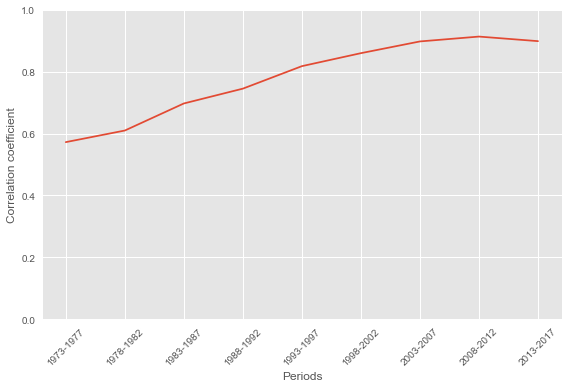

In [90]:
prox_all_df = load_data(prox_all)
corr_list = [cal_corr(prox_all_df, load_data(snapshot)) for snapshot in prox_snapshots]

plt.style.use('ggplot')
plt.plot(periods, corr_list)
plt.xticks(rotation=45)
plt.ylim((0.0, 1.0))
plt.xlabel("Periods")
plt.ylabel("Correlation coefficient")
plt.tight_layout()
plt.savefig(figure_file)
plt.show()

In [15]:
print(prox_all)
print(prox_snapshots)

../../nsp/Data/Derived/Publication_based/Prox/prox_full_1973-2017.csv
['../../nsp/Data/Derived/Publication_based/Prox/snapshot/full/prox_1973-1977.csv', '../../nsp/Data/Derived/Publication_based/Prox/snapshot/full/prox_1978-1982.csv', '../../nsp/Data/Derived/Publication_based/Prox/snapshot/full/prox_1983-1987.csv', '../../nsp/Data/Derived/Publication_based/Prox/snapshot/full/prox_1988-1992.csv', '../../nsp/Data/Derived/Publication_based/Prox/snapshot/full/prox_1993-1997.csv', '../../nsp/Data/Derived/Publication_based/Prox/snapshot/full/prox_1998-2002.csv', '../../nsp/Data/Derived/Publication_based/Prox/snapshot/full/prox_2003-2007.csv', '../../nsp/Data/Derived/Publication_based/Prox/snapshot/full/prox_2008-2012.csv', '../../nsp/Data/Derived/Publication_based/Prox/snapshot/full/prox_2013-2017.csv']


In [34]:
prox_all_df = load_data(prox_all)
prox_all_df.head()

,source,target,weight
0,Acoustics,Acoustics,1.000000
143,Acoustics,Addictive Diseases,0.227273
286,Acoustics,Aerospace Technology,0.074074
429,Acoustics,Agricult & Food Science,0.074627
572,Acoustics,Allergy,0.192982


In [91]:
df = load_data(pjoin(prox_dir, "snapshot", "full", "prox_1973-1977.csv"))
df.head()

,source,target,weight
0,Acoustics,Acoustics,1.000000
143,Acoustics,Addictive Diseases,0.333333
286,Acoustics,Aerospace Technology,0.277778
429,Acoustics,Agricult & Food Science,0.114943
572,Acoustics,Allergy,0.285714


In [39]:
meta_df = prox_all_df.merge(df, on=["source", "target"], how="outer").fillna(0)
meta_df.head()

,source,target,weight_x,weight_y
0,Acoustics,Acoustics,1.000000,1.000000
1,Acoustics,Addictive Diseases,0.227273,0.333333
2,Acoustics,Aerospace Technology,0.074074,0.277778
3,Acoustics,Agricult & Food Science,0.074627,0.114943
4,Acoustics,Allergy,0.192982,0.285714


In [45]:
np.corrcoef(meta_df["weight_x"], meta_df["weight_y"])[0,1]

0.5725499067041662